In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('/content/TSLA (1).CSV')

In [3]:
stock_data=df[['Date', 'Close']]

In [4]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [5]:
stock_data['Date']=pd.to_datetime(stock_data.Date)

In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [7]:
stock_data=stock_data.set_index('Date')

In [8]:
stock_data.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


In [9]:
train_data=stock_data['Close'][:-60]
test_data=stock_data['Close'][-60:]

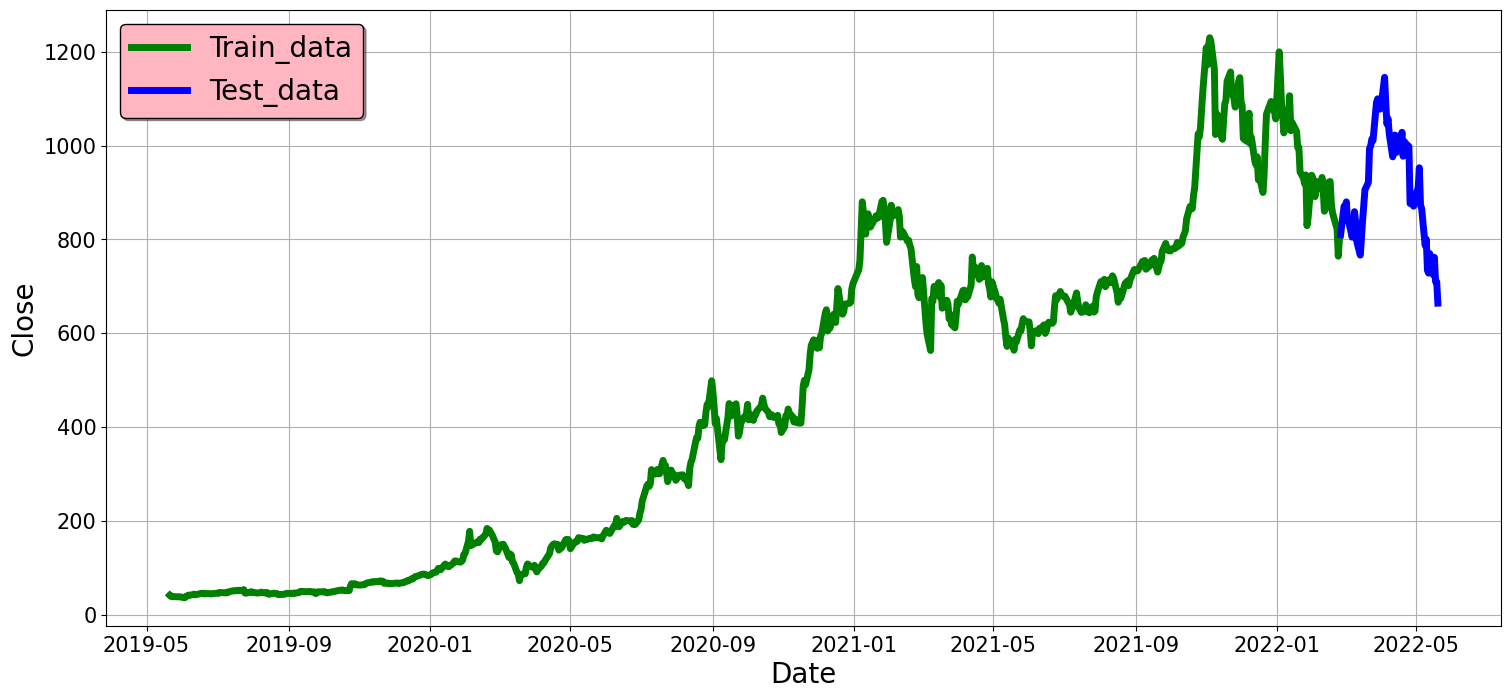

In [10]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(train_data, color='green', label='Train_data', linewidth=5)
plt.plot(test_data, color='blue', label='Test_data', linewidth=5)
plt.legend(fontsize=20, shadow=True, facecolor='lightpink', edgecolor='k')
plt.show()

In [11]:
## Model buliding

In [12]:
import statsmodels.api as sm

In [13]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [14]:
history=[i for i in train_data]

In [15]:
model=ARIMA(history, order=(1,1,1))

In [16]:
model=model.fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  698
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3150.350
Date:                Thu, 04 Jan 2024   AIC                           6306.700
Time:                        12:34:17   BIC                           6320.340
Sample:                             0   HQIC                          6311.974
                                - 698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2397      0.699      0.343      0.731      -1.129       1.609
ma.L1         -0.2713      0.690     -0.393      0.694      -1.623       1.080
sigma2       493.6767     11.690     42.231      0.000     470.765     516.588
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2111.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              31.69   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
model.forecast()

array([800.20438321])

In [19]:
test_data[0]

809.8699951171875

In [20]:
## MSE for single value
mean_squared_error([test_data[0]], model.forecast())

93.42405358558581

In [21]:
p_value=range(0,3)
d_value=range(0,3)
q_value=range(0,3)
for i in p_value:
  for j in d_value:
    for k in q_value:
      print(i,j,k)

0 0 0
0 0 1
0 0 2
0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2


In [22]:
p_value

range(0, 3)

In [23]:
import numpy as np

In [24]:
def train_arima_model(X,y, arima_order):
  # Prepare training  dataset
  # make predictions list

  history=[i for i in X ]
  predictions= list()

  for t in range(len(y)):
    model=ARIMA(history, order=arima_order)
    model=model.fit()
    yhat=model.forecast()[0]
    predictions.append(yhat)
    history.append(y[t])

  # calculate out of sample error
  rmse=np.sqrt(mean_squared_error(y, predictions))
  return rmse


In [31]:
## Evaluate differnet combinations of p,d and q value for an ARIMA model to get best order of ARIMA Model

def evaluate_models(dataset, test, p_value, d_value, q_value):
  dataset=dataset.astype('float32')
  best_score, best_cfg=float("inf"), None  #float("inf"): This initializes best_score with positive infinity (inf). This is often used as an initial value when searching for the minimum value, as any other value will be smaller than positive infinity.

  for p in p_value:
    for d in d_value:
      for q in q_value:
        order=(p,d,q)
        try:
          RMSE=train_arima_model(dataset, test, order)
          if RMSE < best_score:
            best_score, best_cfg=RMSE, order
          print("ARIMA order:%s RMSE=%.3f" % (order,RMSE))
          # print(p,d,q)
        except:
          continue
    print("BEst ARIMA%s RMSE=%.3f" %(best_cfg, best_score))


In [32]:
p_value=range(0,3)
d_value=range(0,3)
q_value=range(0,3)
evaluate_models(train_data, test_data, p_value, d_value, q_value)

ARIMA order:(0, 0, 0) RMSE=457.414
ARIMA order:(0, 0, 1) RMSE=241.164


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA order:(0, 0, 2) RMSE=173.011
ARIMA order:(0, 1, 0) RMSE=39.516
ARIMA order:(0, 1, 1) RMSE=39.482
ARIMA order:(0, 1, 2) RMSE=39.617
ARIMA order:(0, 2, 0) RMSE=57.835
ARIMA order:(0, 2, 1) RMSE=39.611
ARIMA order:(0, 2, 2) RMSE=39.580
BEst ARIMA(0, 1, 1) RMSE=39.482
ARIMA order:(1, 0, 0) RMSE=39.477
ARIMA order:(1, 0, 1) RMSE=39.449
ARIMA order:(1, 0, 2) RMSE=39.584
ARIMA order:(1, 1, 0) RMSE=39.475
ARIMA order:(1, 1, 1) RMSE=39.555
ARIMA order:(1, 1, 2) RMSE=39.935
ARIMA order:(1, 2, 0) RMSE=46.184
ARIMA order:(1, 2, 1) RMSE=39.573
ARIMA order:(1, 2, 2) RMSE=39.731
BEst ARIMA(1, 0, 1) RMSE=39.449
ARIMA order:(2, 0, 0) RMSE=39.440
ARIMA order:(2, 0, 1) RMSE=39.494
ARIMA order:(2, 0, 2) RMSE=39.581
ARIMA order:(2, 1, 0) RMSE=39.635
ARIMA order:(2, 1, 1) RMSE=39.759


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

ARIMA order:(2, 1, 2) RMSE=39.656
ARIMA order:(2, 2, 0) RMSE=45.781
ARIMA order:(2, 2, 1) RMSE=39.739


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA order:(2, 2, 2) RMSE=39.732
BEst ARIMA(2, 0, 0) RMSE=39.440


In [37]:
history=[x for x in train_data]
predictions=list()
for i in range(len(test_data)):
  model=ARIMA(history, order=(2,0,0))
  model=model.fit()
  fc=model.forecast()
  predictions.append(fc)
  history.append(test_data[i])

print(f"mean_sq_error: {np.sqrt(mean_squared_error(test_data, predictions))}")

mean_sq_error: 39.43992944070974


Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-02-17    876.349976
2022-02-18    856.979980
2022-02-22    821.530029
2022-02-23    764.039978
2022-02-24    800.770020
Name: Close, Length: 698, dtype: float64

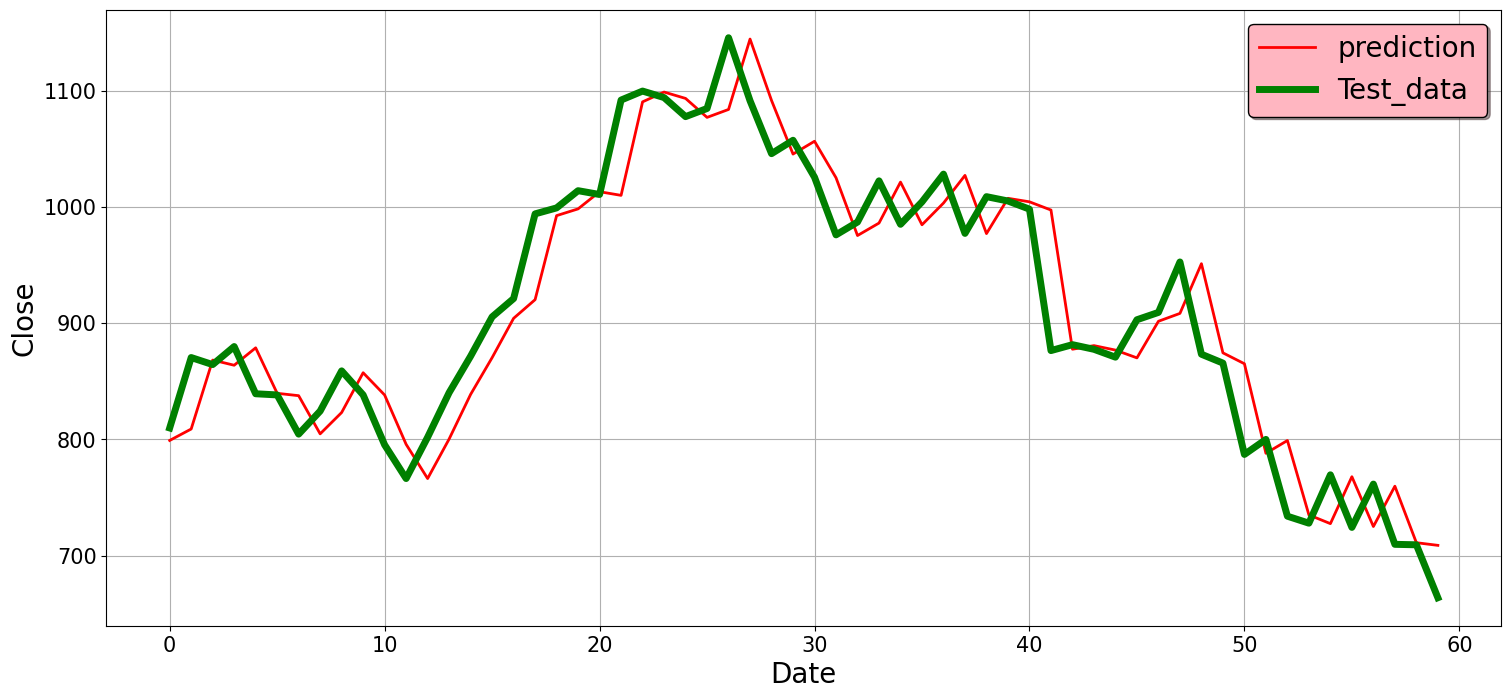

In [53]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(range(len(predictions)),predictions, color='red', label='prediction', linewidth=2)
plt.plot(range(len(test_data)),test_data, color='green', label='Test_data', linewidth=5)
# plt.plot(predictions, color='red', label='predict', linewidth=5)
plt.legend(fontsize=20, shadow=True, facecolor='lightpink', edgecolor='k')

In [54]:
## Converting the prediction data into series.
import pandas as pd
prediction_ser=pd.Series(predictions, index=test_data.index)

In [55]:
prediction_ser

Date
2022-02-25      [799.142618367526]
2022-02-28     [808.9792965128339]
2022-03-01     [868.2636062842837]
2022-03-02     [863.8102207904988]
2022-03-03     [878.7857732109796]
2022-03-04     [839.6820013838658]
2022-03-07     [837.6330698975344]
2022-03-08     [804.8108052465391]
2022-03-09     [823.1708648541446]
2022-03-10     [857.3630330015519]
2022-03-11     [838.1984550982825]
2022-03-14     [795.7993729972145]
2022-03-15     [766.3876417042446]
2022-03-16     [800.3567177065687]
2022-03-17     [838.7344208313503]
2022-03-18     [870.3305580540309]
2022-03-21     [904.1555127651876]
2022-03-22     [920.2058684863798]
2022-03-23      [992.457369029841]
2022-03-24     [998.2717332008363]
2022-03-25    [1013.0300798032018]
2022-03-28    [1009.8950360950225]
2022-03-29    [1090.2962300449612]
2022-03-30     [1098.738698200637]
2022-03-31    [1093.2588283177042]
2022-04-01    [1076.9429688102518]
2022-04-04    [1083.7653668143191]
2022-04-05    [1144.2944394564952]
2022-04-06    [

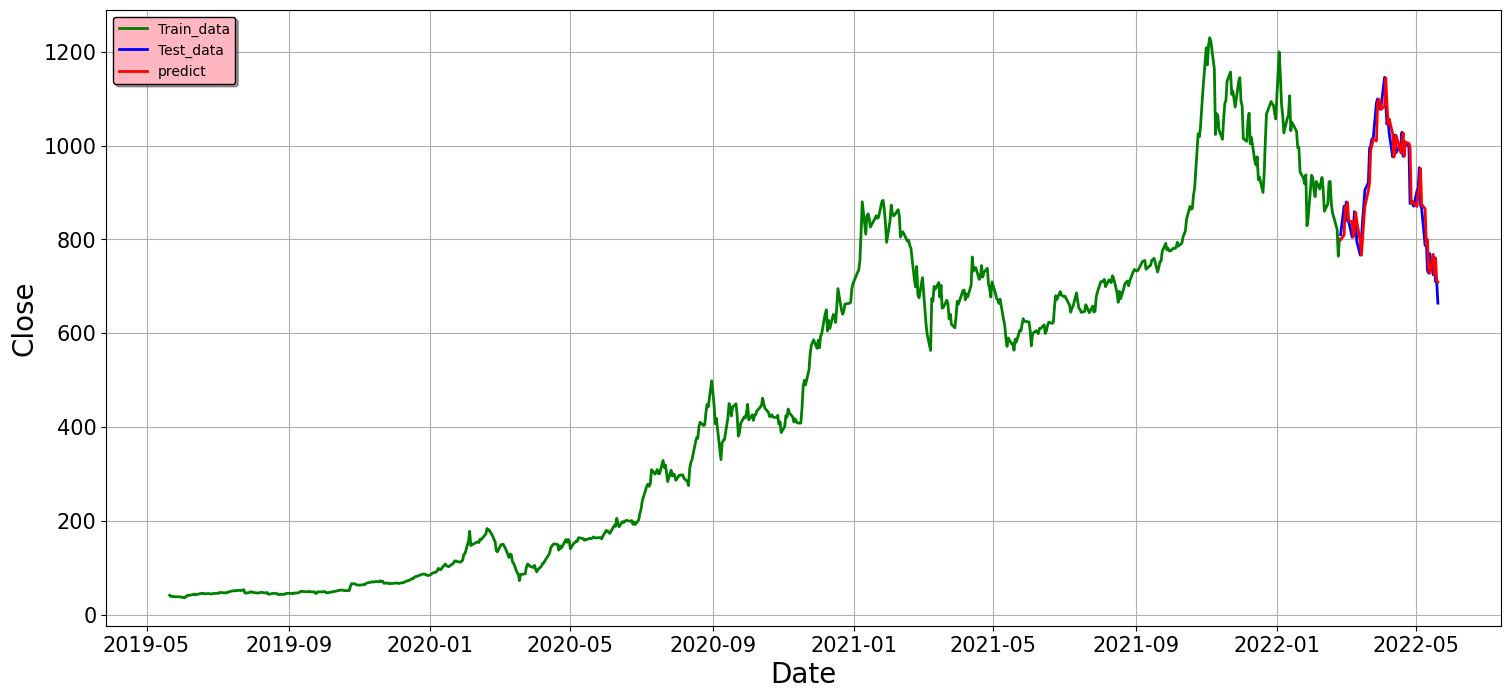

In [58]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(train_data, color='green', label='Train_data', linewidth=2)
plt.plot(test_data ,color='blue', label='Test_data', linewidth=2)
plt.plot(prediction_ser, color='red', label='predict', linewidth=2)
plt.legend(fontsize=10, shadow=True, facecolor='lightpink', edgecolor='k')